# Stack Overflow Annual Developer Survey


In [1]:
import pandas as pd 
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import locale
from matplotlib.ticker import FuncFormatter

##### Import DataSet

In [2]:
df = pd.read_csv('./survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


# Average salary by company size
Calculation of average salary among all employees based on company size

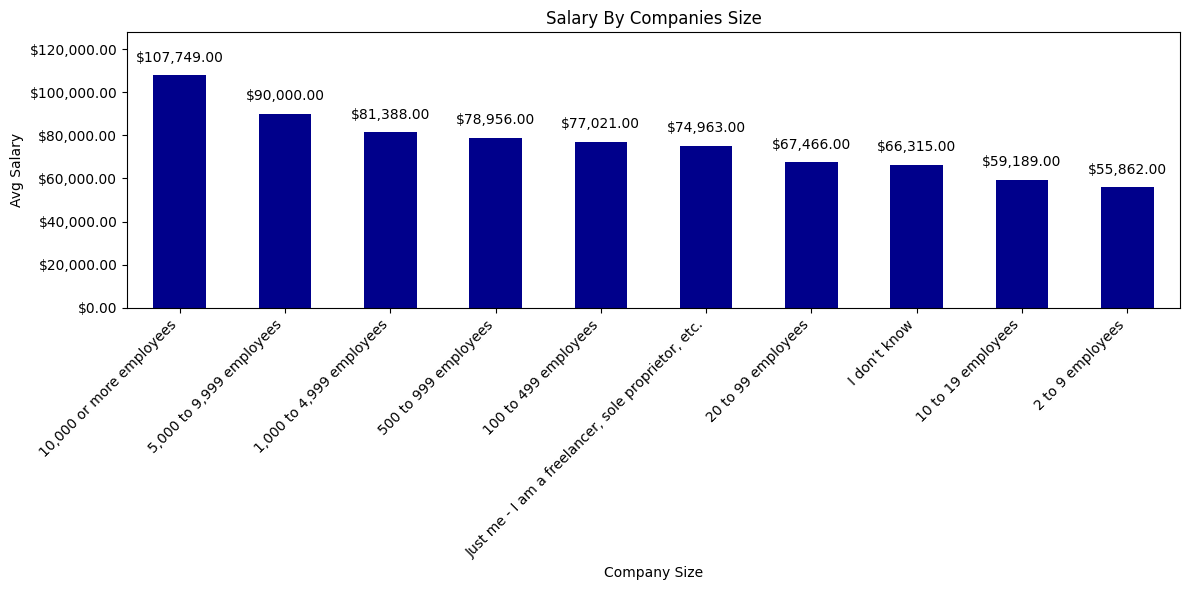

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Grouping by Company and Calculation of Average Converted Annual Salary
avg_salary_by_company = df.groupby('OrgSize')['ConvertedCompYearly'].median().sort_values(ascending=False)

def currency_formatter(x, pos):
    return "${:,.2f}".format(x)

# Visualization of Results
plt.figure(figsize=(12, 6))
bars = avg_salary_by_company.plot(kind='bar', color='darkblue')


for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5000, currency_formatter(yval, None), ha='center', va='bottom')

plt.ylim(0, max(avg_salary_by_company) + 20000)


plt.title('Salary By Companies Size')
plt.xlabel('Company Size')
plt.ylabel('Avg Salary')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))  # Formatar eixo Y
plt.tight_layout()
plt.show()


# Average Salary for Developers in 2023 Based on Hiring Model
Calculates the average salary based on the developer hiring model

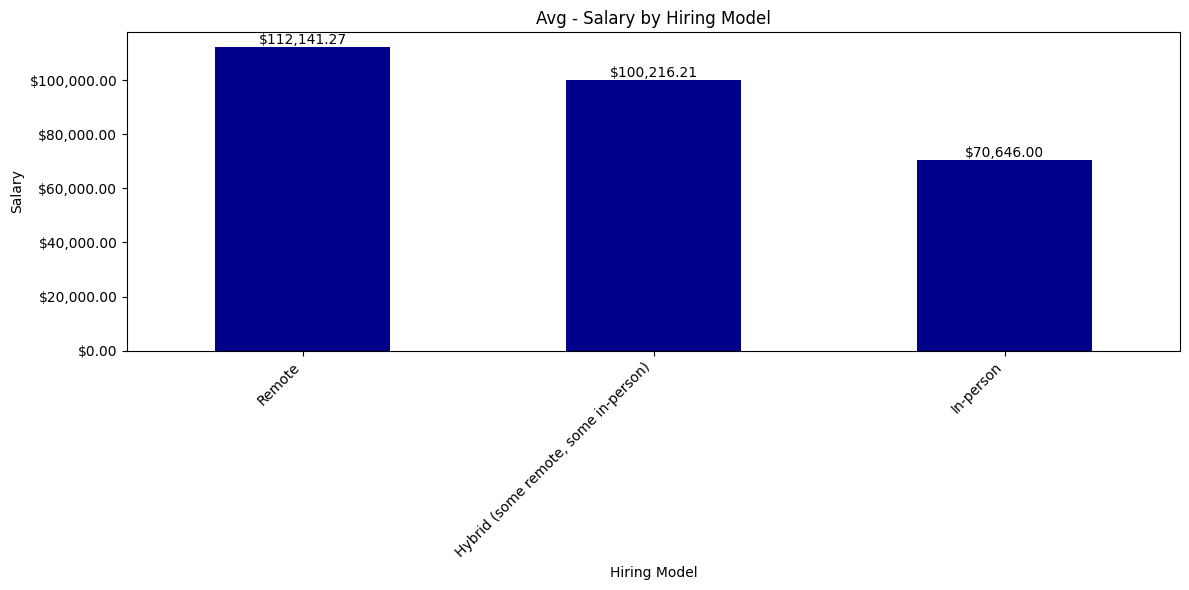

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df_salary = df[['ConvertedCompYearly', 'RemoteWork']]
avg_Hiring_model = df_salary.groupby('RemoteWork')['ConvertedCompYearly'].mean()
top_companies = avg_Hiring_model.sort_values(ascending=False).head(15)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = top_companies.plot(kind='bar', color='darkblue')

# Add data labels (values) to bars with American formatting
def currency_formatter(x, pos):
    """Formats the number to the American standard with commas and decimal points."""
    return "${:,.2f}".format(x)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, currency_formatter(yval, None), ha='center', va='bottom')

# Configure the rest of the graph
plt.title('Avg - Salary by Hiring Model')
plt.xlabel('Hiring Model')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter)) 

# Show the graph
plt.tight_layout()
plt.show()



# Average salary trend considering experience level

This graph shows the average salary by experience level.

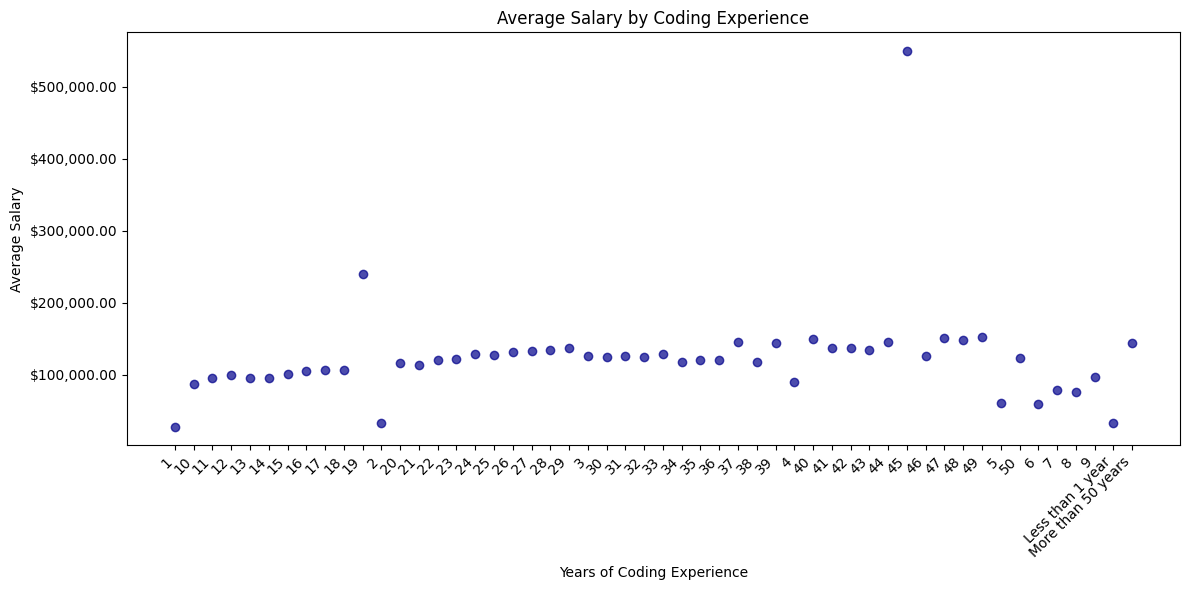

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Grouping by YearsCode and Calculation of Average Converted Annual Salary
avg_salary_by_experience = df.groupby('YearsCode')['ConvertedCompYearly'].mean()

# Visualization of Results in a Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(avg_salary_by_experience.index, avg_salary_by_experience.values, color='darkblue', alpha=0.7)


plt.title('Average Salary by Coding Experience')
plt.xlabel('Years of Coding Experience')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))  

plt.tight_layout() 
plt.show()


# Most popular method of Learning Code in 2023

Ranks the most used study methods in 2023

Text(0, 0.5, 'Method of Learning Code')

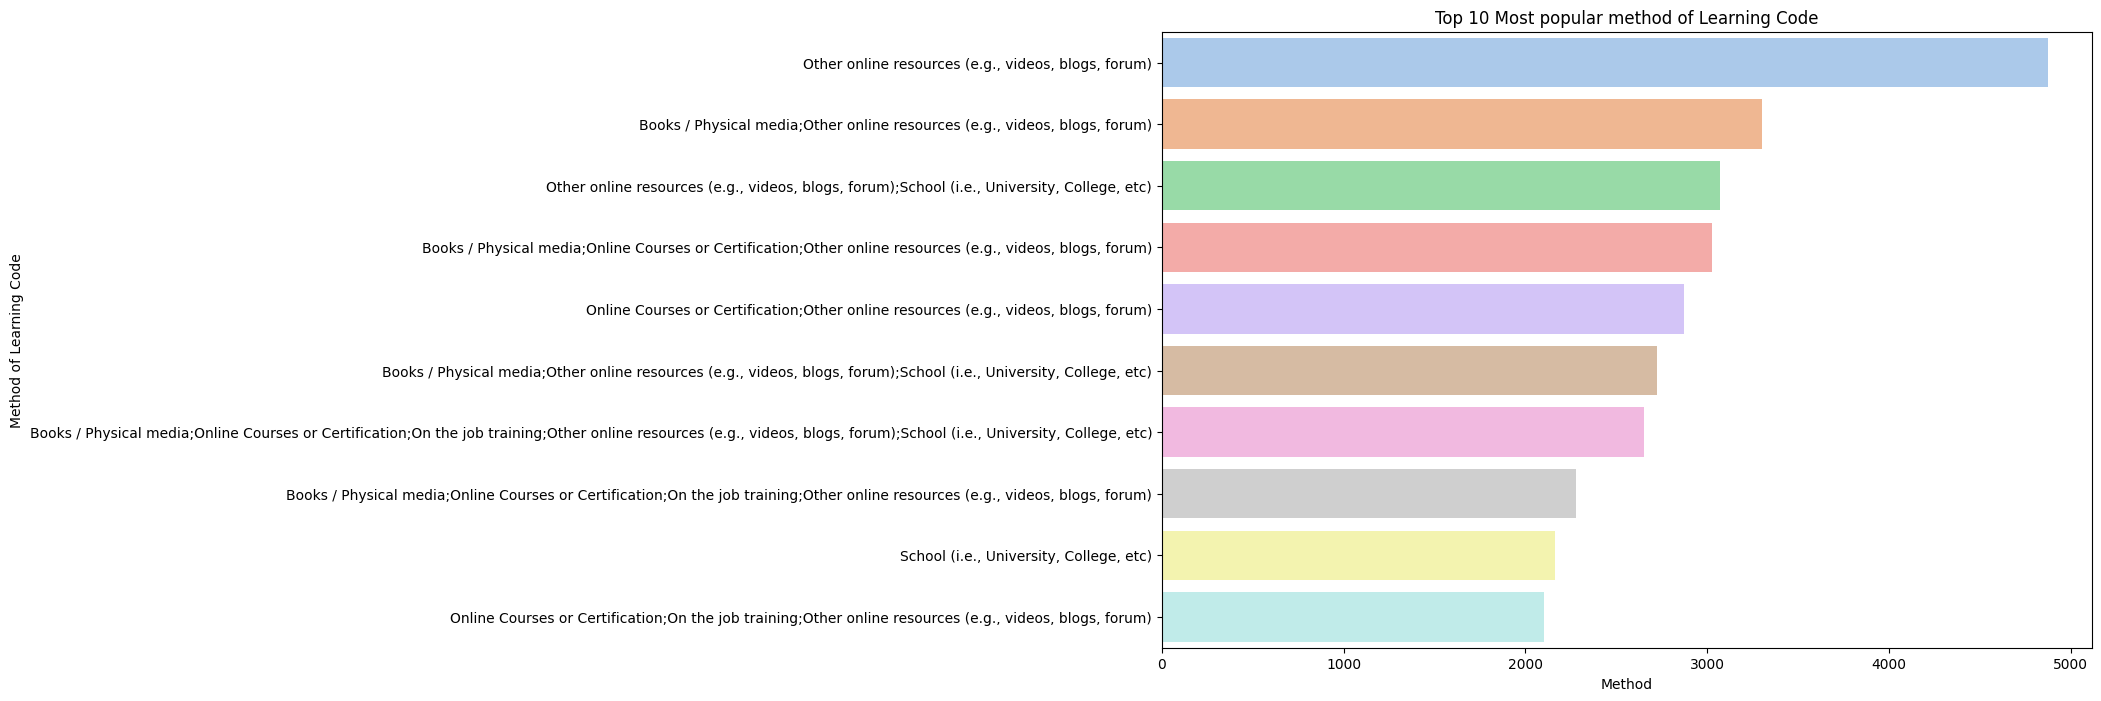

In [6]:
plt.figure(figsize=(12,8))
study = df['LearnCode'].value_counts().head(10)
sns.barplot(x=study, y=study.index, palette='pastel')
plt.title('Top 10 Most popular method of Learning Code')
plt.xlabel('Method')
plt.ylabel('Method of Learning Code')

# Education Level Count for Employees in 2023

Classifies the study levels of employed professionals in 2023

Text(0, 0.5, 'Education Level')

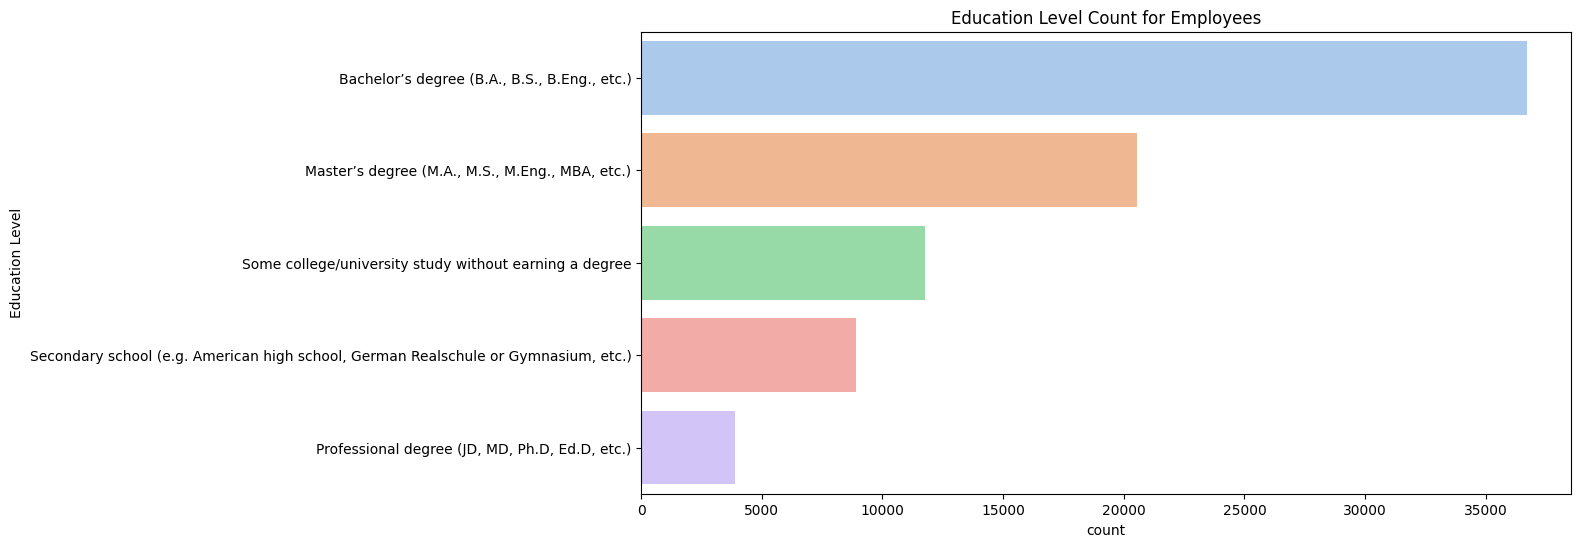

In [7]:
plt.figure(figsize=(12,6))
study = df['EdLevel'].value_counts().head(5)
df = df.dropna(subset=['Employment'])
sns.barplot(x=study, y=study.index, palette='pastel')
plt.title('Education Level Count for Employees')
plt.ylabel('Education Level')